In [1]:
import object as obj
import numpy as np
import matplotlib.pyplot as plt
import math
import geometry as geo
import vizualisation as viz
from scipy.stats import kde
import seaborn as sns
import pandas as pd
from scipy import stats
%matplotlib inline 

In [2]:
from importlib import reload
reload(obj)

<module 'object' from '/Users/thomasvuillaume/Work/Dev/ImArray/ImArray/object.py'>

In [2]:
'''
Shower parameters
'''
impact_point = np.array([0, 10, 0])

# shower direction
salt = math.radians(74)
saz = math.radians(0)

# pointing direction
talt = math.radians(74)
taz = math.radians(0)

# shower parameters
s_top = [0, 0, 15000]
s_bot = [0, 0, 1000]
s_center = [0, 0, 8000]
stop = 15000
slength = 12000
swidth = 200


npoints = 50000

tel_normal = geo.altaz_to_normal(talt, taz)
tel1 = geo.Telescope([500, 100, -100], tel_normal, 0)
alltel = [tel1]

Some plotting functions

In [4]:
def shower_hists(shower, nbins=20, range = None):     
    x = shower[:,0]
    y = shower[:,1]
    z = shower[:,2]
    
    if range:
        xmin = range[0]
        xmax = range[1]
        ymin = range[2]
        ymax = range[3]
    else:
        xmin = x.min()
        xmax = x.max()
        ymin = y.min()
        ymax = y.max()

    f, axarr = plt.subplots(3, 3)
    axarr[1, 1].hist2d(x, y, bins=20)
    axarr[0, 0].set_title('X,Y')
    axarr[0, 1].hist(x)
    axarr[0, 1].set_title('X')
    axarr[1, 0].hist(y)
    axarr[1, 0].set_title('Y')
    axarr[1, 1].hist(z)
    axarr[1, 1].set_title('Z')
    # Fine-tune figure; hide x ticks for top plots and y ticks for right plots
    plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
    plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)

def gaussian(X,Y,nbins=20, range = None):
    if range:
        xmin = range[0]
        xmax = range[1]
        ymin = range[2]
        ymax = range[3]
    else:
        xmin = X.min()
        xmax = X.max()
        ymin = Y.min()
        ymax = Y.max()
    
    
    k = kde.gaussian_kde(np.array([X,Y]))
    xi, yi = np.mgrid[xmin:xmax:nbins*1j, ymin:ymax:nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    plt.pcolormesh(xi, yi, zi.reshape(xi.shape))
    plt.colorbar()
    plt.show()

In [5]:
Gaisser = obj.Get_pos_Gaisser_Hillas(npoints, salt, saz, impact_point)
Gaisser_rot = obj.shower_rot(Gaisser,salt,saz,impact_point)
#shower = obj.random_ellipsoide(stop, slength, swidth, salt, saz, impact_point, npoints)
shower_center = [0, 0, stop - slength/2.]
ellipsoide = obj.random_ellipsoide_alongz(shower_center, slength, swidth, npoints)
ellipsoide_rot = obj.shower_rot(shower_rot, salt, saz, impact_point)

df_ellipsoide = pd.DataFrame(ellipsoide, columns=["x", "y", "z"])

TypeError: shower_rot() takes 3 positional arguments but 4 were given

Ellipsoid:

/Users/thomasvuillaume/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


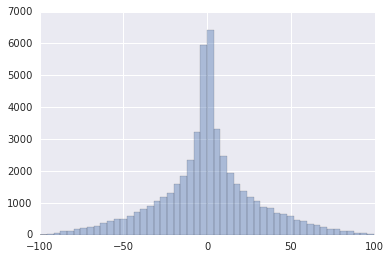

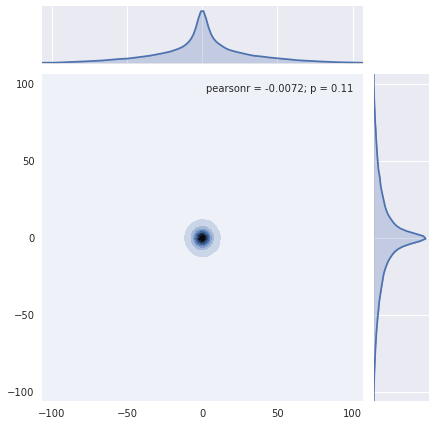

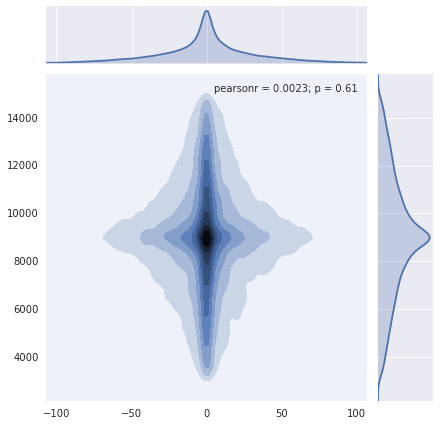

In [95]:
sns.distplot(ellipsoide[:,0], kde=False)
sns.jointplot(x=ellipsoide[:,0],y=ellipsoide[:,1],kind="kde")
sns.jointplot(x=ellipsoide[:,0],y=ellipsoide[:,2],kind="kde")

Rotated Ellipsoide:

/Users/thomasvuillaume/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


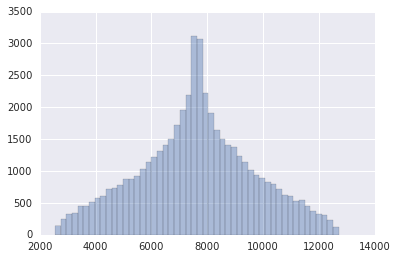

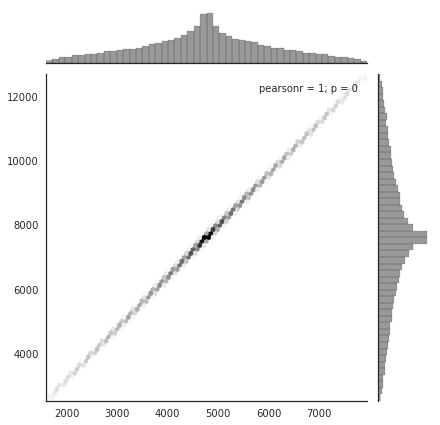

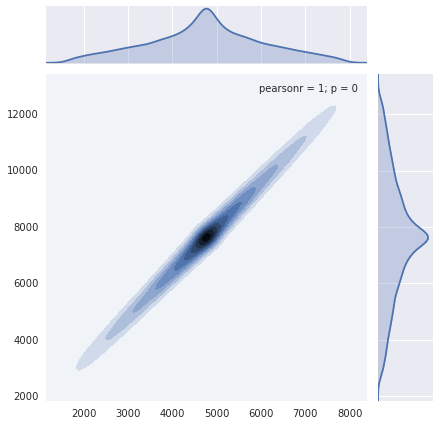

In [96]:
sns.distplot(ellipsoide_rot[:,2], kde=False)
with sns.axes_style("white"):
    sns.jointplot(x=ellipsoide_rot[:,0], y=ellipsoide_rot[:,2], kind="hex", color="k")
sns.jointplot(x=ellipsoide_rot[:,0],y=ellipsoide_rot[:,2],kind="kde")
sns.jointplot(x=ellipsoide_rot[:,0], y=ellipsoide_rot[:,2], kind="kde")

Gaisser:

/Users/thomasvuillaume/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


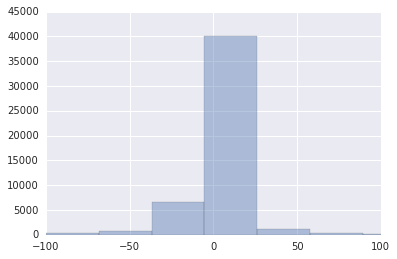

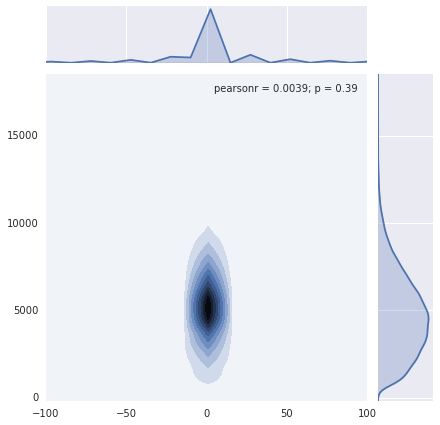

In [139]:
p = sns.distplot(Gaisser[:,0], kde=False)
p.set_xlim((-100,100))
p = sns.jointplot(x=Gaisser[:,0],y=Gaisser[:,2],kind="kde",xlim=(-100,100))
#sns.jointplot(x=Gaisser[:,0], y=Gaisser[:,2],kind="kde")

(-100, 100)

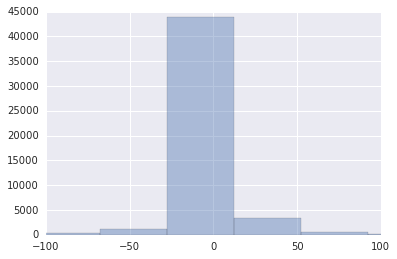

In [141]:
p = sns.distplot(Gaisser[:,1], kde=False)
p.set_xlim(-100,100)

Rotated Gaisser:

In [152]:
p = sns.distplot(Gaisser_rot[:,0], kde=False)

TypeError: object of type 'numpy.float64' has no len()

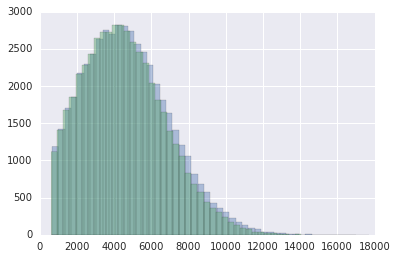

In [103]:
sns.distplot(Gaisser[:,2], kde=False)
sns.distplot(Gaisser_rot[:,2], kde=False)
# with sns.axes_style("white"):
#     sns.jointplot(x=Gaisser_rot[:,0], y=Gaisser_rot[:,1], kind="hex", color="k")
# sns.jointplot(x=Gaisser_rot[:,0],y=Gaisser_rot[:,1],kind="kde")
# sns.jointplot(x=Gaisser_rot[:,0], y=Gaisser_rot[:,2],kind="kde")

<IPython.core.display.Javascript object>


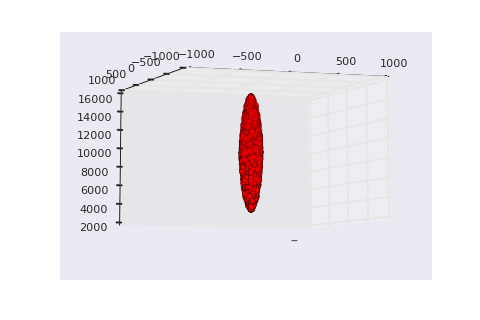

In [149]:
%matplotlib qt5
viz.plot_shower3d(ellipsoide, alltel)

<IPython.core.display.Javascript object>


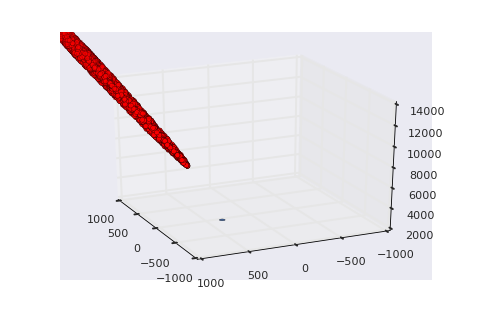

In [150]:
viz.plot_shower3d(ellipsoide_rot, alltel)

<IPython.core.display.Javascript object>


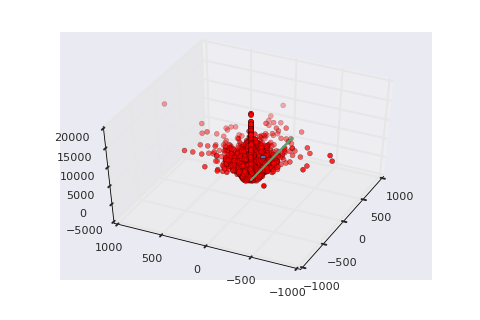

In [151]:
viz.plot_shower3d(Gaisser, alltel)

In [10]:
%matplotlib inline
import scipy.special as ss
import scipy.integrate as si

In [11]:
X1 = 10
Xmax = 600
lamb = 70.
W = Xmax - X1
eps = W / lamb
Nmax = 2
X = np.arange(X1, 2000)

### Normed Gaisser Hillas

In [188]:
GH = obj.Normed_Gaisser_Hillas(X1, Xmax, X)

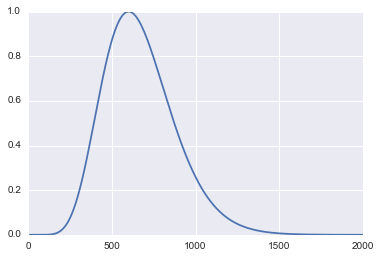

In [189]:
plt.plot(X,GH)

### Cumulative Gaisser Hillas

In [190]:
GH = np.nan_to_num(GH)

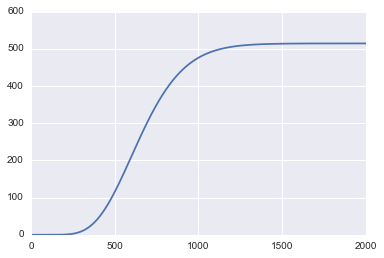

In [191]:
I = GH.cumsum()
plt.plot(X, I)

### Normed Gaisser Hillas by Mattews09

In [192]:
def Ngh_s(x ,eps):
    assert np.all(x>=-1) and eps>0
    return np.nan_to_num(np.power(1+x, eps) * np.exp(-eps *x))

### Gaisser-Hillas scaled

In [193]:
def Ngh(X, Nmax, Xmax, X1, lam):
    assert np.all(X>=X1) and Xmax>=X1 and Nmax > 0 and lam >0
    W = Xmax - X1
    x = (X-Xmax)/W
    eps = W / lam
    return Nmax * Ngh_s(x, eps)

In [194]:
Ngh_s(-0.3, eps)
Ngh(X, 10, 100, 0, 10)

array([  8.10308393e-06,   1.90172511e-05,   4.10774902e-05, ...,
         4.15066260e-69,   3.77452385e-69,   3.43246271e-69])

In [195]:
GH2 = Ngh(X, 1, Xmax, X1, lamb)

### The two correspond:

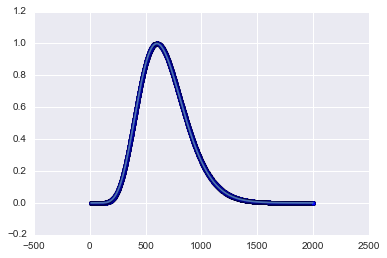

In [196]:
plt.plot(X, GH)
plt.scatter(X, GH2)

### Normed Cumulative by me

In [197]:
# def Ingh_s(eps, x_min, x_max):
#     return np.exp(eps) * eps**(-1-eps) * ss.gamma(1+eps) * (ss.gammaincc(1+eps, eps*(1+x_min)) - ss.gammaincc(1+eps, eps*(1+x_max)))

def Ingh_s(eps, x_min, x_max):
    assert np.all(x_min >= -1) and np.all(x_max >= -1)
    return np.exp(eps) * eps**(-(eps+1)) * ss.gamma(1+eps) * (ss.gammaincc(1+eps, eps*(1+x_min)) - ss.gammaincc(1+eps, eps*(1+x_max)))
Ingh_s(eps, -1, 2)

0.87188949935169047

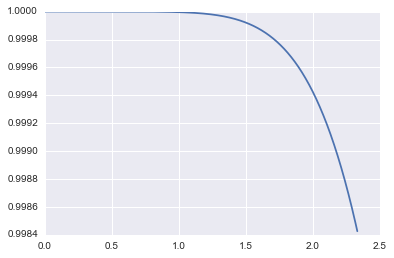

In [198]:
Y = np.arange(2000)/Xmax - 1
plt.plot(Y,ss.gammaincc(eps, Y))

Note that the cumulative should be computed between 0 and X

### It works?

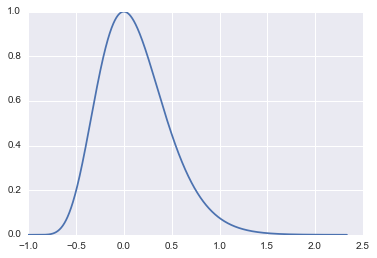

In [199]:
nghs = Ngh_s(Y, eps)
plt.plot(Y, nghs)

In [200]:
IntNum_nghs = np.empty(len(Y))
for idx, y in enumerate(Y):
    IntNum_nghs[idx] = si.quad(Ngh_s, Y.min(), y, args = (eps,))[0]
IntNum_nghs

array([  0.00000000e+00,   3.06565439e-24,   2.08588899e-21, ...,
         8.71963979e-01,   8.71964105e-01,   8.71964229e-01])

In [201]:
Cum_num_nghs = nghs.cumsum()
IntTh_nghs = Ingh_s(eps, Y.min(), Y)
Ingh_s(eps, -Xmax/W, -Xmax/W+1)
plt.scatter(Y, Cum_num_nghs)
Cum_num_nghs

AssertionError: 

In [ ]:
plt.plot(Y, IntTh_nghs)
plt.scatter(Y, IntNum_nghs)

### Scaled Cumulative by me:

In [ ]:
def Ingh(X, Nmax, Xmax, X1, lam):
    assert np.all(X>=X1) and Xmax > X1
    W = Xmax - X1
    x = (X - Xmax) / W
    eps = W / lam
    # print(W, x, eps, Xmax/W, (X-Xmax)/W)
    return W * Nmax * Ingh_s(eps, -1, (X-Xmax)/W)

In [ ]:
Ingh(X, Nmax, Xmax, 10, lamb)

In [202]:
IntNum_ngh = np.empty(len(X))
for idx, x in enumerate(X):
    IntNum_ngh[idx] = si.quad(Ngh, X.min(), x, args = (Nmax, Xmax, X1, lamb))[0]
IntNum_ngh

array([  0.00000000e+00,   4.23772838e-21,   2.88275451e-18, ...,
         1.02892064e+03,   1.02892076e+03,   1.02892087e+03])

In [205]:
Ith = Ingh(X, Nmax, Xmax, X1, lamb)
print("Numerical integration:", IntNum_ngh.max())
print("Analytical integration:", Ith.max())
print("Integration by Matthews09", Nmax * W * eps**(-1-eps) * np.exp(eps) * ss.gamma(1+eps))
Ingh_s(eps, -1., 3) * W

Numerical integration: 1028.92087485
Analytical integration: 1028.92087485
Integration by Matthews09 1028.93234794


514.46605970573398

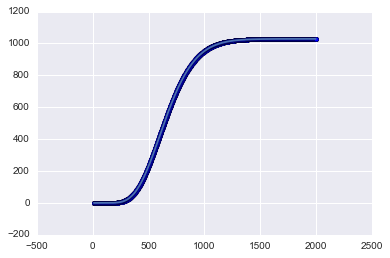

In [206]:
plt.plot(X, IntNum_ngh)
plt.scatter(X, Ith)

## BIM !

Let's try to invert this shit now:

$ y = W * Ingh_s \left(\epsilon, \frac{-X_{max}}{W}, \frac{(X-X{max})}{W} \right)$  
$ y = W \, Ingh_s(\epsilon, -Xmax/W, (X-Xmax)/W) $

$ Ingh_s (\epsilon, x_{min}, x_{max}) = \exp(\epsilon) \epsilon^{-(1+\epsilon)} \Gamma(1+\epsilon) (\Gamma(1+\epsilon, \epsilon (1+x_{min})) - \Gamma(1+\epsilon, \epsilon (1+x_{max}))) $

$$ Cum(\epsilon, x) = W \,\exp(\epsilon) \Gamma(1+\epsilon) \, \epsilon^{-(1+\epsilon)} \left( \Gamma \left(1+\epsilon, \epsilon (1 - \frac{X_{max}}{W} )\right) - \Gamma \left(1+\epsilon, \epsilon \left(1 +  \frac{(X-X_{max})}{W} \right) \right) \right) $$

$ \Gamma(1+\epsilon, \epsilon \left(1 + (X-Xmax)/W )\right) = \Gamma \left(1+\epsilon, \epsilon (1 - \frac{X_{max}}{W} )\right) - \frac {Cum(\epsilon,x)} {W \exp(\epsilon) \epsilon^{-(1 + \epsilon)} \Gamma(1+\epsilon)}  $

$$ \epsilon (1 + (X-Xmax)/W ) )=  \Gamma^{-1} \left( 1+\epsilon,   \Gamma \left(1+\epsilon, \epsilon (1 - \frac{X_{max}}{W} )\right) - \frac {Y} {W \exp(\epsilon) \epsilon^{-(1 + \epsilon)} \Gamma(1+\epsilon)} \right)   $$

$$ X = Xmax + W \left(\frac{1}{\epsilon}  \Gamma^{-1}(...) - 1 \right) $$

Compute $\displaystyle X_{max}/W $ once  
Compute $ \displaystyle \Gamma \left(1+\epsilon, \epsilon (1 - \frac{X_{max}}{W} )\right) $ once  
$ Y = Cum(\epsilon,x)$ is the unknown (random draw)

In [207]:
def CumInv(Y, Nmax, Xmax, X1, lam):
    W = Xmax - X1
    eps = W / lam
    # c1 = ss.gamma(1+eps) * ss.gammaincc(1+eps, eps*(1 - Xmax/W))
    # c1 = ss.gamma(1+eps) * np.nan_to_num(ss.gammaincc(1+eps, eps*max(1 - Xmax/W, 0.)))
    c1 = ss.gamma(1 + eps)
    c2 = Nmax * W * np.exp(eps) * eps**(-1-eps)
    print(W, eps, c1, c2, (c1 - Y/c2)/ss.gamma(1+eps) / eps)
    return Xmax + W * (- 1 + ss.gammainccinv(1+eps, (c1 - Y/c2)/ss.gamma(1+eps)) / eps)

In [208]:
CumInv(500, 1, Xmax, 43, lamb)

557 7.957142857142857 36789.5540209 0.0135952723277 4.120874901e-05


1637.8577234470595

In [215]:
XX = CumInv(Ith, Nmax, Xmax, X1, lamb)

590 8.428571428571429 101990.612202 0.0100885005564 [  1.18644068e-01   1.18644068e-01   1.18644068e-01 ...,   1.35029472e-06
   1.33654781e-06   1.32293831e-06]


In [216]:
a = ss.gammaincc(eps, 10)
b = ss.gamma(eps) * ss.gammaincc(eps, 10)
print(a, b)
print(ss.gammainccinv(eps, a))
print(ss.gammainccinv(eps, b /ss.gamma(eps)))

0.266203214038 3221.21358286
10.0
10.0


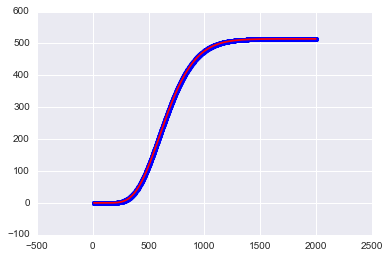

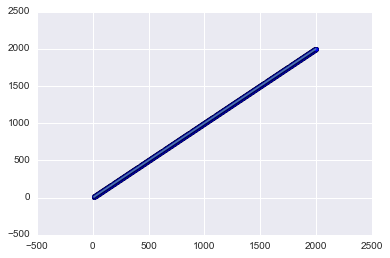

In [219]:
I
plt.scatter(XX, I, color ='blue')
plt.plot(X, I, color ='red')
plt.show()
plt.plot(X, XX)
plt.scatter(X,X)

In [220]:
x = 300
X1 = 10
Cum = Ingh(x, 1, Xmax, X1, lamb)
CumInv(Cum, 1, Xmax, X1, lamb)

590 8.428571428571429 101990.612202 0.0050442502782 0.116559280908


300.0000000000004

# GROS BIM

In [229]:
Y = np.random.uniform(0,I.max(),10000)

In [230]:
CI = CumInv(Y, 1, Xmax, X1, lamb)

590 8.428571428571429 101990.612202 0.0050442502782 [ 0.05245598  0.07336811  0.02986763 ...,  0.0203957   0.0418879
  0.10766811]


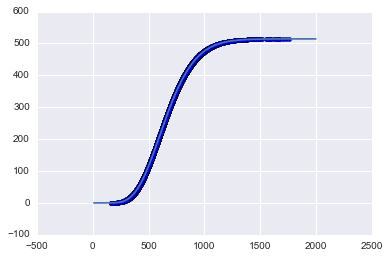

In [231]:
plt.scatter(CI, Y)
plt.plot(X, I)

(array([   42.,   237.,   601.,  1086.,  1409.,  1525.,  1376.,  1207.,
          907.,   607.,   415.,   240.,   159.,    87.,    51.,    24.,
           12.,     5.,     7.,     3.]),
 array([  163.61543767,   243.32294915,   323.03046062,   402.7379721 ,
          482.44548358,   562.15299505,   641.86050653,   721.56801801,
          801.27552948,   880.98304096,   960.69055244,  1040.39806391,
         1120.10557539,  1199.81308687,  1279.52059834,  1359.22810982,
         1438.9356213 ,  1518.64313277,  1598.35064425,  1678.05815573,
         1757.76566721]),
 <a list of 20 Patch objects>)

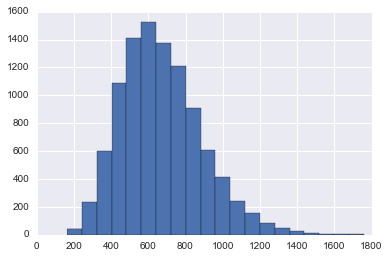

In [232]:
plt.hist(CI, bins=20);

# Radial distribution

$$ f(r) = \frac{2 r R^2}{(r^2 + R^2)^2} $$

$$ \int f(r) dr = -\frac{R^2}{r^2 + R^2}$$

$$ Cumf = \int_0^x f(r) dr = 1 - \frac{1}{1 + (x/R)^2} $$

$$ \int_0^\infty f(r) dr = 1 $$

If $ y = Cumf(x) $ then  
$$ x = R \sqrt{\frac{y}{1-y}}$$

In [259]:
def f(r, R):
    return 2*r*R**2/(r**2+R**2)**2

In [270]:
R = 30
r = np.linspace(0, 10*R, 1000)
fr = f(r,R)

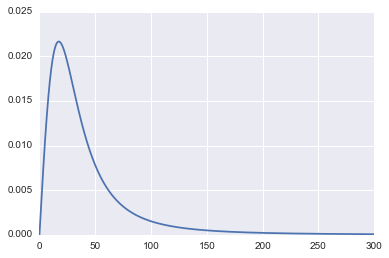

In [271]:
plt.plot(r,fr)

In [272]:
def f_integral(x_min, x_max, R):
    return 1/(1+(x_min/R)**2) - 1/(1+(x_max/R)**2)

In [273]:
def Cum_f(x, R):
    return f_integral(0, x, R)

In [274]:
Cum_f_num = np.empty(len(r))
for idx, v in enumerate(r):
    Cum_f_num[idx] = si.quad(f, 0, v, args=(R,))[0]

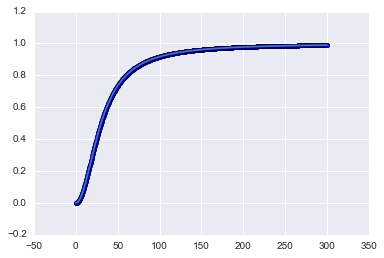

In [280]:
Cf = Cum_f(r, R)
plt.plot(r, Cf)
plt.scatter(r, Cum_f_num)

In [276]:
def Cum_f_inv(y, R):
    return R * np.sqrt(y/(1-y))

In [284]:
rr = Cum_f_inv(Cf, R)

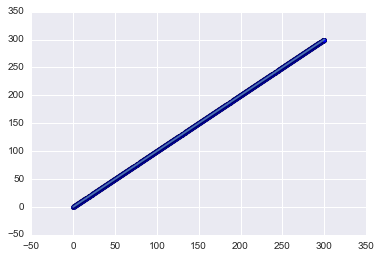

In [285]:
plt.plot(r, rr)
plt.scatter(r, r)

In [322]:
reload(obj)

<module 'object' from '/Users/thomasvuillaume/Work/Dev/ImArray/ImArray/object.py'>

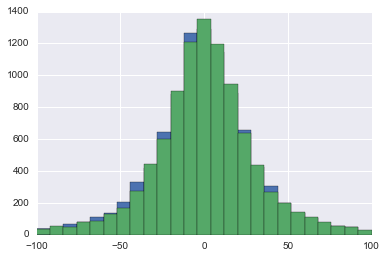

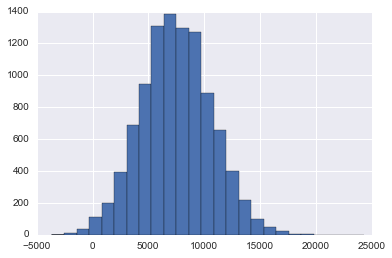

In [332]:
s = obj.gaisser_hillas_shower(0, 0, 70, 0, [0,10,0], 10000)
plt.hist(s[:,0], range=([-100,100]), bins =25);
plt.hist(s[:,1], range=([-100,100]), bins =25);
plt.show()
plt.hist(s[:,2], bins =25);

In [3]:
g_old = obj.Get_pos_Gaisser_Hillas(npoints, salt, saz, impact_point)

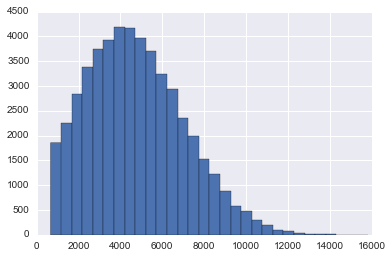

In [6]:
plt.hist(g_old[:,2], bins=30);

In [8]:
Y = np.random.uniform(0, 1, npoints)

In [13]:
max_ngh = obj.gaisser_hillas_integral_0_inf(Nmax, Xmax, X1, lamb)
NZ = obj.gaisser_hillas_integral_inverse(Y * max_ngh, Nmax, Xmax, X1, lamb)

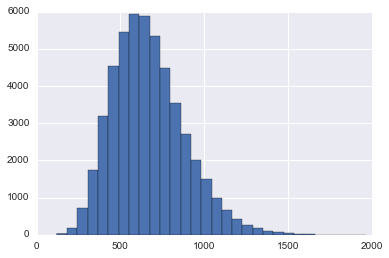

In [16]:
plt.hist(NZ, bins=30);